In [ ]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

#The Double Pendulum in PYTHON
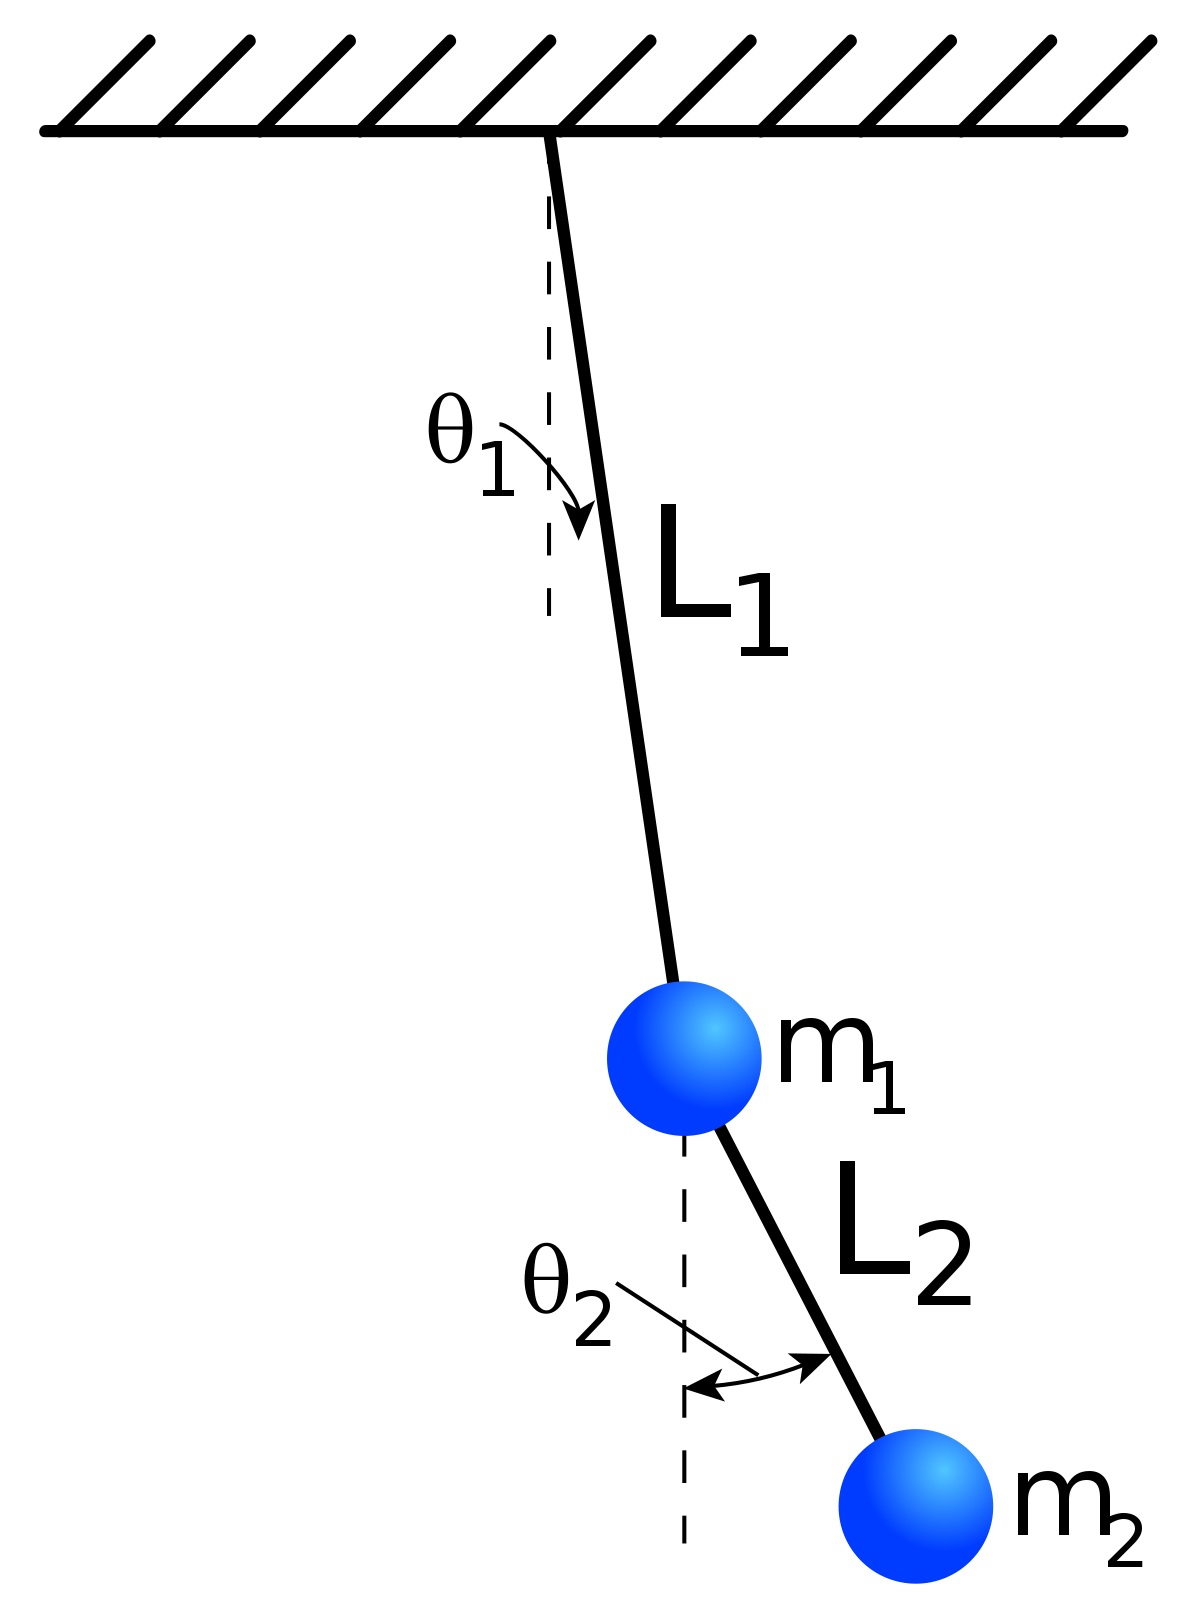


Definir los símbolos apropiados usando sympy. Definimos las variables, constante de gravitación, las masas y longitudes de las cuerdas

In [ ]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

$\theta_1$ y $\theta_2$ son funciones de tiempo (para los cuales vamos a resolver más adelante). Las debemos definir cuidadosamente. Estas se han definido como funciones.


In [ ]:
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)


Explicitly write them as functions of time **t** :



In [ ]:
the1 = the1(t)
the2 = the2(t)

In [ ]:
the1

\theta_1(t)

Define derivatives and second derivatives



In [ ]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

the1_d

Derivative(\theta_1(t), t)

Define $x_1, y_1, x_2$ and $y_2$ se escriben en terminos de los parametros de 
arriba. Son las posiciones respectivas de cada péndulo.

In [ ]:
x1 = L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

Then use these to define kinetic and potential energy for each mass. Obtain the Lagrangian



In [ ]:
# Kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = T-V

In [ ]:
T

0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

In [ ]:
V

-L1*g*m1*cos(\theta_1(t)) + g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t)))

In [ ]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Obtenemos las ecuaciones de Lagrange. Para cada coordenada independiente. $\theta_1$ y $\theta_2$

In [ ]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()

Resolvemos las ecuaciones de lagrange (Esto asume que LE1 Y LE2 son las dos igual a cero)

In [ ]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

In [ ]:
sols[the1_dd]

-1.0*L1*m2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L1*m2*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) - 1.0*L1*m2*sin(\theta_1(t))*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L1*m2*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) + 1.0*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t)/(1.0*L1*m1 - 1.0*L1*m2*cos(\theta_1(t) - \theta_2(t))**2 + 1.0*L1*m2) - 1.0*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta

Ahora, necesitamos definir/carmbiar las ecuaciones de segundo orden de $\theta_1$ y $\theta_2$ en unas que sean de primer orden

También, con la función **lambdify** se realiza la conversión de las expresiones símbolicas dadas a expresiones númericas.

In [ ]:
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

Ahora, lo que se realizar es definir una una función que toma un vector s y realizar los cálculos necesarios en la solución de cada derivada. A su vez, que nos retorne este conjunto de soluciones en la solución.

In [ ]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

Ahora si, con el sistema de ecuaciones podemos resolver la solución con las condiciones iniciales

In [ ]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=10
m2=10
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g,m1,m2,L1,L2))

In [ ]:
ans.T

array([[  1.        ,   0.87278598,   0.72612142, ..., -13.97127275,
        -14.14550705, -14.291241  ],
       [ -3.        ,  -3.38639276,  -3.99996576, ...,  -4.45626829,
         -4.0715321 ,  -3.23167358],
       [ -1.        ,  -0.78337908,  -0.52102584, ...,  -1.57756575,
         -1.22187329,  -0.91941951],
       [  5.        ,   5.89534493,   7.35468869, ...,   8.89802921,
          8.40300894,   6.78347929]])

In [ ]:
the1 = ans.T[0]
the2 = ans.T[2]

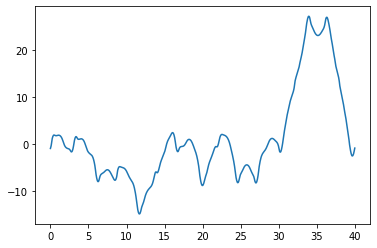

In [ ]:
plt.plot(t, the2)
plt.show()

In [ ]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

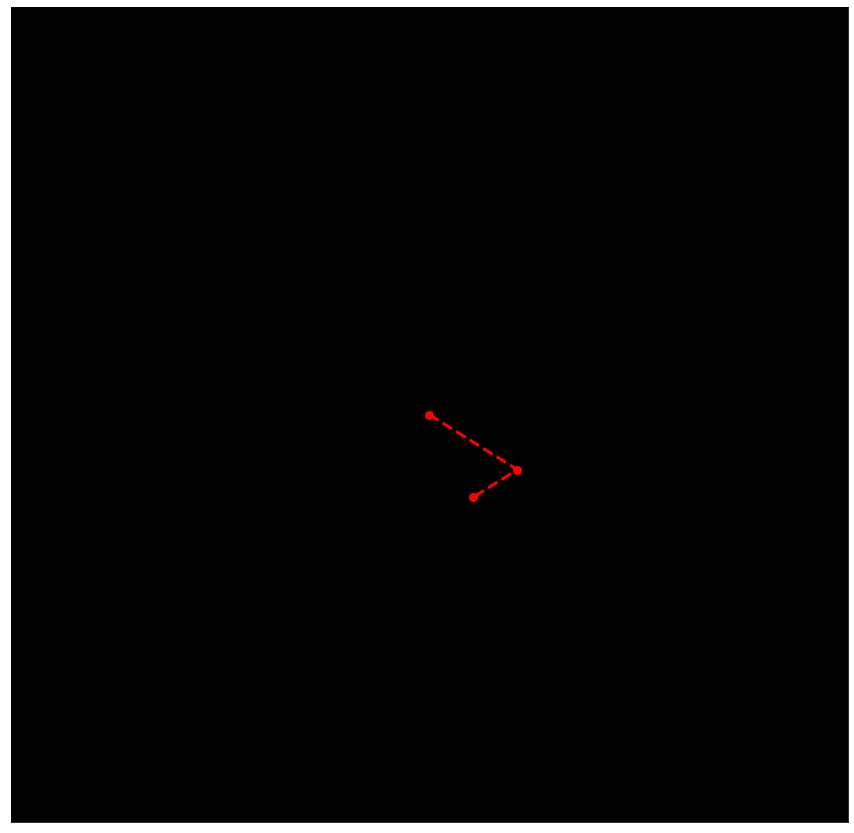

In [ ]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-8,8)
ax.set_xlim(-8,8)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)